<a href="https://colab.research.google.com/github/acchu0408/Sentiment-Analysis/blob/main/Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from functools import reduce
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns

In [20]:
from google.colab import files
uploaded = files.upload()

Saving TestBed.csv to TestBed (1).csv


In [36]:
data = pd.read_csv("TestBed (1).csv") #reading the csv file

In [38]:
print(data.info()) #data description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Delta_TP9     36 non-null     float64
 1   Delta_AF7     36 non-null     float64
 2   Delta_AF8     36 non-null     float64
 3   Delta_TP10    36 non-null     float64
 4   Theta_TP9     36 non-null     float64
 5   Theta_AF7     36 non-null     float64
 6   Theta_AF8     36 non-null     float64
 7   Theta_TP10    36 non-null     float64
 8   Alpha_TP9     36 non-null     float64
 9   Alpha_AF7     36 non-null     float64
 10  Alpha_AF8     36 non-null     float64
 11  Alpha_TP10    36 non-null     float64
 12  Beta_TP9      36 non-null     float64
 13  Beta_AF7      36 non-null     float64
 14  Beta_AF8      36 non-null     float64
 15  Beta_TP10     36 non-null     float64
 16  Gamma_TP9     36 non-null     float64
 17  Gamma_AF7     36 non-null     float64
 18  Gamma_AF8     36 non-null     fl

In [39]:
data #data display

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,Gender,Mental State
0,0.917199,0.842963,0.769605,0.879536,0.763745,0.606565,0.482789,0.735808,0.965197,0.657406,...,0.859724,0.595153,0.346715,0.753941,0.514125,0.327050,-0.020979,0.363278,Male,Stress
1,1.111343,0.754507,0.922292,0.753203,0.721984,0.162381,0.282484,0.409040,0.782391,0.144042,...,0.467616,-0.068045,0.008437,0.291740,-0.063472,-0.408698,-0.358466,-0.100222,Male,Stress
2,1.050727,0.567654,0.741445,0.986774,0.524375,0.216938,0.369601,0.668342,0.733240,0.310796,...,0.701006,0.028196,0.097818,0.739109,0.391622,-0.394508,-0.328508,0.433148,Male,Stress
3,0.604789,0.228117,0.283061,0.581971,0.578303,0.185458,0.305324,0.557924,1.214056,0.552278,...,0.750374,1.031451,1.218523,0.702959,0.354547,0.850854,1.058579,0.296863,Female,Calm
4,0.586245,0.590424,0.561799,0.553334,0.492481,0.277630,0.302192,0.479115,1.147198,0.467830,...,0.361338,0.505080,0.696107,0.363679,-0.137191,0.177753,0.438271,-0.081710,Female,Calm
5,0.242565,0.185193,0.242455,0.225176,0.217162,0.047447,0.061434,0.181896,0.665035,0.346584,...,0.360429,0.053442,0.070269,0.374956,-0.298472,-0.413357,-0.415452,-0.178189,Female,Calm
6,0.272285,0.013821,-0.083292,0.253507,0.286540,-0.154412,-0.226933,0.162820,0.631315,0.107372,...,0.505872,-0.077507,-0.030788,0.355779,0.018354,-0.431122,-0.317002,-0.053970,Male,Calm
7,1.181521,0.020174,0.653719,1.107555,0.992097,0.344259,0.339834,0.912476,1.465112,0.358827,...,0.738612,1.032660,0.136690,0.520330,-0.262806,0.567746,-0.393580,-0.303979,Male,Calm
8,0.917199,0.842963,0.769605,0.879536,0.763745,0.606565,0.482789,0.735808,0.965197,0.657406,...,0.859724,0.595153,0.346715,0.753941,0.514125,0.327050,-0.020979,0.363278,Male,Stress
9,0.917199,0.842963,0.769605,0.879536,0.763745,0.606565,0.482789,0.735808,0.965197,0.657406,...,0.859724,0.595153,0.346715,0.753941,0.514125,0.327050,-0.020979,0.363278,Male,Stress


In [40]:
vis_data = data.iloc[:,:20]
vis_data

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10
0,0.917199,0.842963,0.769605,0.879536,0.763745,0.606565,0.482789,0.735808,0.965197,0.657406,0.589944,0.919032,0.859724,0.595153,0.346715,0.753941,0.514125,0.327050,-0.020979,0.363278
1,1.111343,0.754507,0.922292,0.753203,0.721984,0.162381,0.282484,0.409040,0.782391,0.144042,0.234349,0.534561,0.467616,-0.068045,0.008437,0.291740,-0.063472,-0.408698,-0.358466,-0.100222
2,1.050727,0.567654,0.741445,0.986774,0.524375,0.216938,0.369601,0.668342,0.733240,0.310796,0.342213,0.850898,0.701006,0.028196,0.097818,0.739109,0.391622,-0.394508,-0.328508,0.433148
3,0.604789,0.228117,0.283061,0.581971,0.578303,0.185458,0.305324,0.557924,1.214056,0.552278,0.587479,1.184792,0.750374,1.031451,1.218523,0.702959,0.354547,0.850854,1.058579,0.296863
4,0.586245,0.590424,0.561799,0.553334,0.492481,0.277630,0.302192,0.479115,1.147198,0.467830,0.498302,1.108532,0.361338,0.505080,0.696107,0.363679,-0.137191,0.177753,0.438271,-0.081710
5,0.242565,0.185193,0.242455,0.225176,0.217162,0.047447,0.061434,0.181896,0.665035,0.346584,0.339636,0.630943,0.360429,0.053442,0.070269,0.374956,-0.298472,-0.413357,-0.415452,-0.178189
6,0.272285,0.013821,-0.083292,0.253507,0.286540,-0.154412,-0.226933,0.162820,0.631315,0.107372,0.064287,0.477738,0.505872,-0.077507,-0.030788,0.355779,0.018354,-0.431122,-0.317002,-0.053970
7,1.181521,0.020174,0.653719,1.107555,0.992097,0.344259,0.339834,0.912476,1.465112,0.358827,0.636533,1.385367,0.738612,1.032660,0.136690,0.520330,-0.262806,0.567746,-0.393580,-0.303979
8,0.917199,0.842963,0.769605,0.879536,0.763745,0.606565,0.482789,0.735808,0.965197,0.657406,0.589944,0.919032,0.859724,0.595153,0.346715,0.753941,0.514125,0.327050,-0.020979,0.363278
9,0.917199,0.842963,0.769605,0.879536,0.763745,0.606565,0.482789,0.735808,0.965197,0.657406,0.589944,0.919032,0.859724,0.595153,0.346715,0.753941,0.514125,0.327050,-0.020979,0.363278


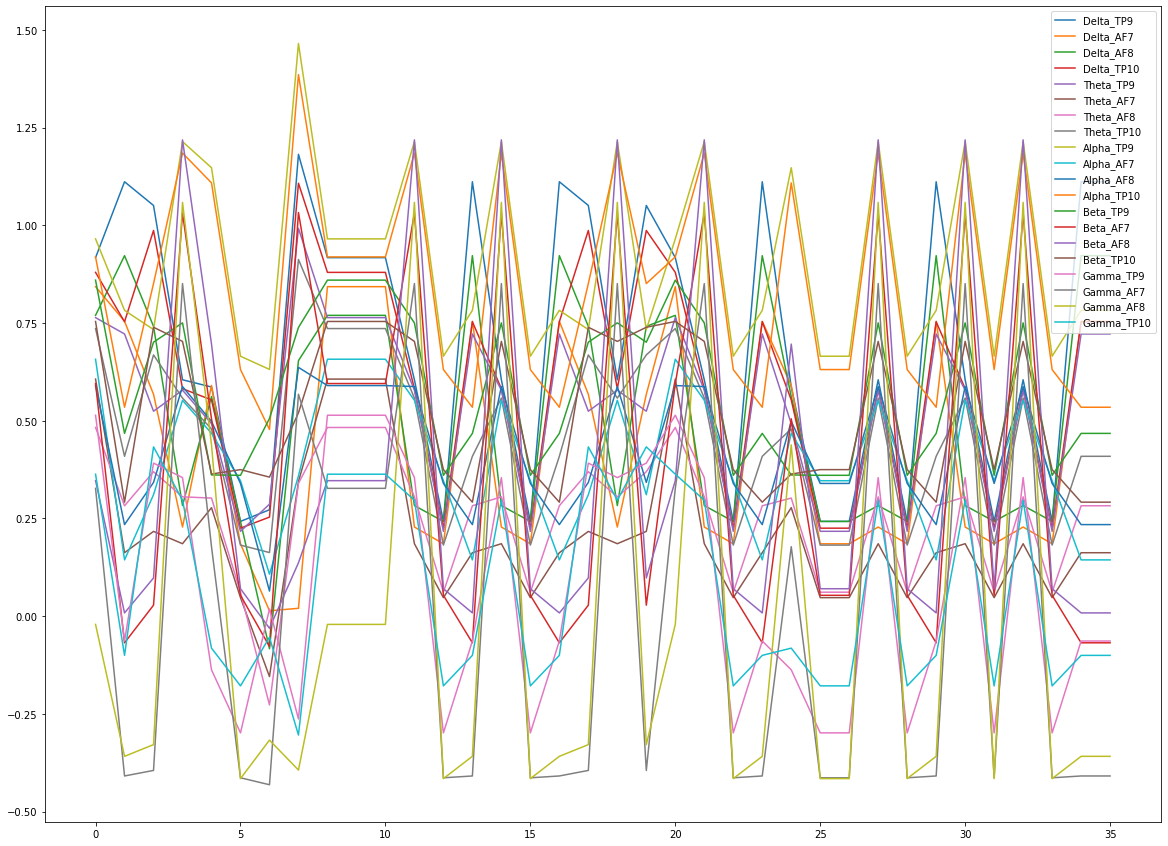

In [41]:
vis_data.iloc[:,:].plot(figsize=(20,15))

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Mental State']=le.fit_transform(data['Mental State'])

In [43]:
y = data.pop('Mental State')
z = data.pop('Gender')
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=48)
#X_train = np.array(X_train, dtype = np.float32).reshape((X_train.shape[0],X_train.shape[1],1))

#X_test = np.array(X_test, dtype = np.float32).reshape((X_test.shape[0],X_test.shape[1],1))


y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [44]:
inputs = tf.keras.Input(shape=(X_train.shape[1],1))

gru = tf.keras.layers.GRU(20, return_sequences=True)(inputs)
flat = Flatten()(gru)
outputs = Dense(2, activation='softmax')(flat)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 gru_2 (GRU)                 (None, 20, 20)            1320      
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 802       
                                                                 
Total params: 2,122
Trainable params: 2,122
Non-trainable params: 0
_________________________________________________________________


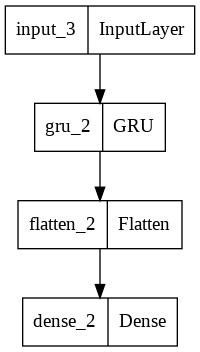

In [45]:
tf.keras.utils.plot_model(model)

In [46]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):



        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
             
        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=32,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])

        
        saved_model = load_model(save_to + '_best_model.h5')
        
        return model,history
        

In [47]:
model,history = train_model(model, X_train, y_train,X_test, y_test, save_to= './', epoch = 30)

model.save('ann.h5')

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.6975 - accuracy: 0.2800
Epoch 1: val_accuracy improved from -inf to 0.72727, saving model to ./_best_model.h5
1/1 [==============================] - 2s 2s/step - loss: 0.6975 - accuracy: 0.2800 - val_loss: 0.6869 - val_accuracy: 0.7273 - lr: 0.0010
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.4400
Epoch 2: val_accuracy did not improve from 0.72727
1/1 [==============================] - 0s 48ms/step - loss: 0.6948 - accuracy: 0.4400 - val_loss: 0.6833 - val_accuracy: 0.7273 - lr: 9.0484e-04
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.4400
Epoch 3: val_accuracy improved from 0.72727 to 0.81818, saving model to ./_best_model.h5
1/1 [==============================] - 0s 69ms/step - loss: 0.6923 - accuracy: 0.4400 - val_loss: 0.6800 - val_accuracy: 0.8182 - lr: 8.1873e-04
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 0.6

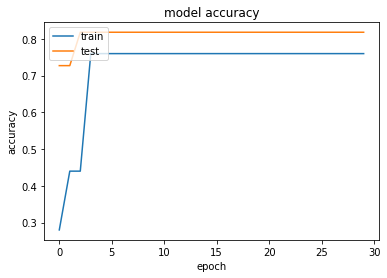

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [49]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 81.818%


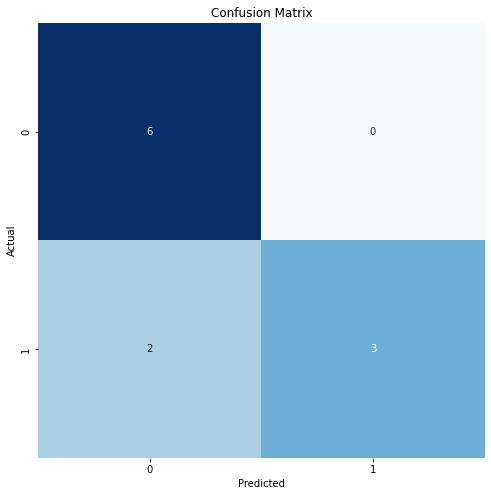

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.60      0.75         5

    accuracy                           0.82        11
   macro avg       0.88      0.80      0.80        11
weighted avg       0.86      0.82      0.81        11



In [50]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test = y_test.idxmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)